# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Agung Nugraha]
- **Email:** [anugrah171819@gmail.com]
- **ID Dicoding:** [Agungngrhhhh]


## Pertanyaan Bisnis

1. berapa jumlah penyewaan sepeda per bulan selama tahun 2011 dan 2012?
2. berapa jumlah perbedaan penyewaan sepeda pada holiday, non hiliday, weekday dan workingday?
3. Apakah penyewaan oleh pengguna terdaftar (registered) lebih tinggi dibandingkan pengguna tidak terdaftar (casual)?

## Packages/Library yang Digunakan

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
import streamlit as st

## Data Wrangling

### Gathering Data
* Load semua dataset

In [6]:
day_df = pd.read_csv('/Users/agungnugraha/Documents/SQL/main/day.csv')

In [7]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
hour_df = pd.read_csv('/Users/agungnugraha/Documents/SQL/main/hour.csv')

In [20]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- kita disini berhasil memuat semua data yang dibutuhkan, baik pada tabel day dan hour.

### Assessing Data
- periksa tipe data pada setiap kolom pada tabel day dan hour
- memeriksa apakah terdapat missing value
- memerikasa apakah terdapat data duplikat


In [21]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [22]:
day_df.isna().sum()
print("jumlah data duplikat table day: ", day_df.duplicated().sum())

jumlah data duplikat table day:  0


In [23]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [24]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [25]:
hour_df.isna().sum()
print('jumlah data duplikat tabel hour: ', hour_df.duplicated().sum())

jumlah data duplikat tabel hour:  0


In [26]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- pada table day, terdapat kesalahan tipe data pada kolom dteday (object), dimana seharusnya adalah datetime.
- pada table hour, terdapat kesalahan tipe data pada kolom dteday (object), dimana seharusnya adalah datetime.
- baik table day dan hour tidak terdapat missing value, inaccurate value, ataupun data duplikat

### Cleaning Data

In [27]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [28]:
hour_df ['dteday'] = pd.to_datetime(hour_df['dteday'])
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


**Insight:**
- disini kita telah berhasil mengubah tipe data pada table day & hour, pada kolom dteday menjadi tipe data datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
day_df.describe(include='all')
# menjawab pertanyaan 1
data_2011 = day_df[day_df['yr'] == 0]  
data_2012 = day_df[day_df['yr'] == 1]

avg_rentals_2011 = data_2011.groupby('mnth')['cnt'].mean()
avg_rentals_2012 = data_2012.groupby('mnth')['cnt'].mean()

month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

avg_rentals_2011.index = avg_rentals_2011.index.map(month_map)
avg_rentals_2012.index = avg_rentals_2012.index.map(month_map)
print(avg_rentals_2011)
print(avg_rentals_2012)



mnth
January      1231.903226
February     1721.964286
March        2065.967742
April        3162.333333
May          4381.322581
June         4783.733333
July         4559.387097
August       4409.387097
September    4247.266667
October      3984.225806
November     3405.566667
December     2816.870968
Name: cnt, dtype: float64
mnth
January      3120.774194
February     3556.448276
March        5318.548387
April        5807.466667
May          6318.225806
June         6761.000000
July         6567.967742
August       6919.451613
September    7285.766667
October      6414.225806
November     5088.800000
December     3990.741935
Name: cnt, dtype: float64


**Insight:**

Berdasarkan hasil diatas, dapat dirumuskan beberapa insight yang diperoleh:
1. Peningkatan yang signifikan dapat dilihat pada bulan Januari (1231.90 menjadi 3120.77) dan Februari (1721.96 menjadi 3556.45).
2. Tahun 2011: Bulan Juni memiliki penyewaan tertinggi (4783.73), diikuti oleh Juli dan Mei.
3. Tahun 2012: Bulan September memiliki penyewaan tertinggi (7285.77), diikuti oleh Agustus dan Juni.
4. Tahun 2011: Bulan Januari memiliki penyewaan terendah (1231.90), diikuti oleh Februari dan Desember.
5. Tahun 2012: Bulan Januari tetap menjadi bulan dengan penyewaan terendah (3120.77), meskipun jumlahnya lebih tinggi dibandingkan tahun sebelumnya.
6. jumlah penyewaan sepeda pada tahun 2012 secara konsisten lebih tinggi dibandingkan tahun 2011. Hal ini menunjukkan adanya peningkatan popularitas atau penggunaan sepeda dari tahun 2011 ke 2012.

In [13]:
# menjawab pertanyaan 2
avg_rentals_holiday = day_df[day_df['holiday'] == 1]['cnt'].mean()
avg_rentals_non_holiday = day_df[day_df['holiday'] == 0]['cnt'].mean()

avg_rentals_workingday = day_df.groupby('workingday')['cnt'].mean()
avg_rentals_weekday = day_df.groupby('weekday')['cnt'].mean()

print('Rata-rata penyewaan sepeda berdasarkan hari libur: ', avg_rentals_holiday)
print('Rata-rata penyewaan sepeda bukan berdasarkan hari libur: ', avg_rentals_non_holiday)
print('Rata-rata penyewaan sepeda berdasarkan weekday: ', avg_rentals_weekday)
print('Rata-rata penyewaan sepeda berdasarkan workingday: ', avg_rentals_workingday)

diff_holiday = avg_rentals_holiday - avg_rentals_non_holiday
print("\nPerbedaan rata-rata penyewaan antara hari libur dan bukan libur:", diff_holiday)



Rata-rata penyewaan sepeda berdasarkan hari libur:  3735.0
Rata-rata penyewaan sepeda bukan berdasarkan hari libur:  4527.104225352113
Rata-rata penyewaan sepeda berdasarkan weekday:  weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64
Rata-rata penyewaan sepeda berdasarkan workingday:  workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64

Perbedaan rata-rata penyewaan antara hari libur dan bukan libur: -792.1042253521127


## insight: ##
1. Rata-rata penyewaan sepeda berdasarkan hari libur adalah 3735.0
2. Rata-rata penyewaan bukan hari libur adalah 4527.1
3. Rata-rata penyewaan sepeda berdasarkan weekday cenderung meningkat dibandingkan hari libur
4. Rata-rata penyewaan sepeda berdasarkan workingday bukan hari kerja (0) adalah 4330.17
5. Rata-rata penyewaan sepeda berdasarkan workingday hari kerja (1) adalah 4584.82
6. Rata-rata perbedaan penyewaa sepeda pada hari libur lebih rendah 792.1 dibandingkan hari biasa.

In [14]:
# menjawab pertanyaan ke 3

total_casual_day = day_df['casual'].sum()
total_registered_day = day_df['registered'].sum()
avg_registered_day = day_df['registered'].mean()
avg_casual_day = day_df['casual'].mean()

total_casual_hour = hour_df['casual'].sum()
total_registered_hour = hour_df['registered'].sum()
avg_registered_hour = hour_df['registered'].mean()
avg_casual_hour = hour_df['casual'].mean()

print("DATASET DAY")
print(f"total rentals - Registered : {total_registered_day}, Casual : {total_casual_day}")
print(f"Average Rentals - Registered: {avg_registered_day:.2f}, Casual: {avg_casual_day:.2f}\n")

print("DATASET HOUR:")
print(f"Total Rentals - Registered: {total_registered_hour}, Casual: {total_casual_hour}")
print(f"Average Rentals - Registered: {avg_registered_hour:.2f}, Casual: {avg_casual_hour:.2f}\n")


DATASET DAY
total rentals - Registered : 2672662, Casual : 620017
Average Rentals - Registered: 3656.17, Casual: 848.18

DATASET HOUR:
Total Rentals - Registered: 2672662, Casual: 620017
Average Rentals - Registered: 153.79, Casual: 35.68



## Visualization & Explanatory Analysis

### Pertanyaan 1:

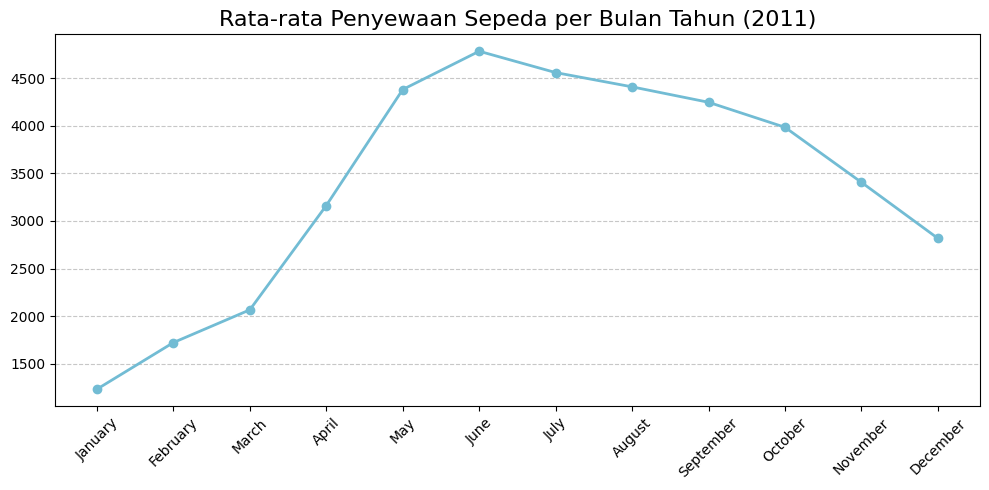

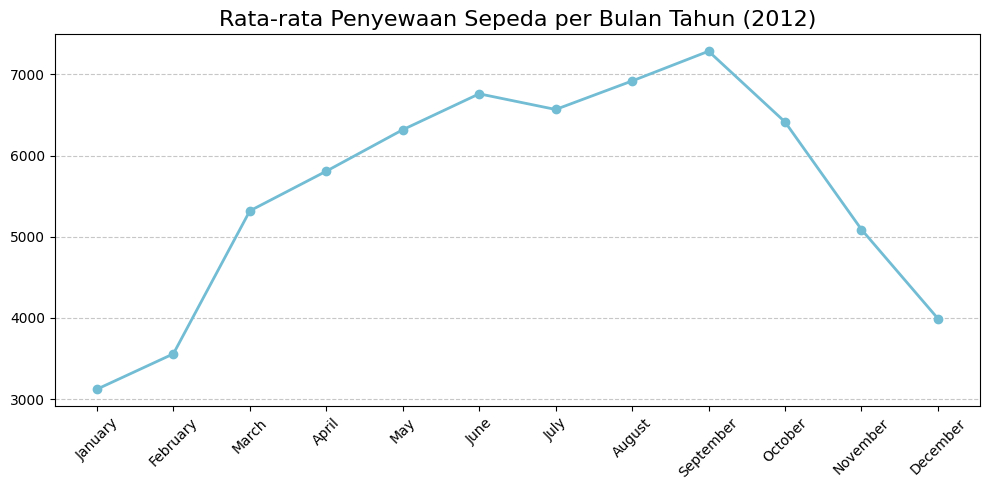

In [15]:
plt.figure(figsize=(10, 5))
plt.title('Rata-rata Penyewaan Sepeda per Bulan Tahun (2011)', loc='center', fontsize=16)
plt.plot(avg_rentals_2011.index, avg_rentals_2011.values, 
         marker='o', linewidth=2, color="#72BCD4")
plt.xticks(ticks=range(len(avg_rentals_2011)), labels=avg_rentals_2011.index, fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.title('Rata-rata Penyewaan Sepeda per Bulan Tahun (2012)', loc='center', fontsize=16)
plt.plot(avg_rentals_2012.index, avg_rentals_2012.values, 
         marker='o', linewidth=2, color="#72BCD4")
plt.xticks(ticks=range(len(avg_rentals_2012)), labels=avg_rentals_2012.index, fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Insight ##
- **Tren penyewaan sepeda tahun 2011**
1. Grafik menunjukkan peningkatan jumlah penyewaan sepeda dari Januari hingga Juni, mencapai puncaknya pada bulan Juni.
2. Setelah bulan Juni, penyewaan menurun secara bertahap hingga Desember.
3. Mei hingga September, menjadi periode dengan penyewaan tertinggi.
- **Tren penyewaan sepeda tahun 2012**
1. Tren serupa terlihat pada tahun 2012, dengan peningkatan penyewaan dari Januari hingga September.
2. Puncak penyewaan terjadi pada bulan September.
3. Setelah itu, terjadi penurunan yang signifikan dari Oktober hingga Desember.
- **kesimpulan:** secera keseluruhan,  jumlah penyewaan sepeda pada setiap bulan di tahun 2012 lebih tinggi dibandingkan tahun 2011, menunjukkan peningkatan popularitas atau penggunaan sepeda dan peningkatan signifikan dapat terlihat pada bulan-bulan awal (Januari-Maret) dan bulan puncak (Juni-September) tahun 2012 dibandingkan 2011.

### Pertanyaan 2:

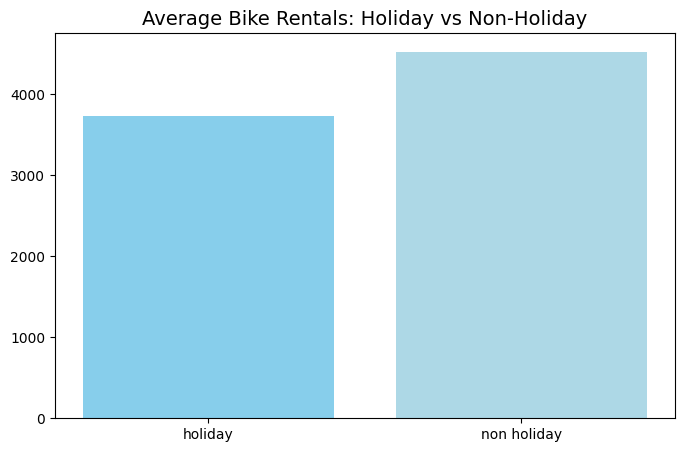

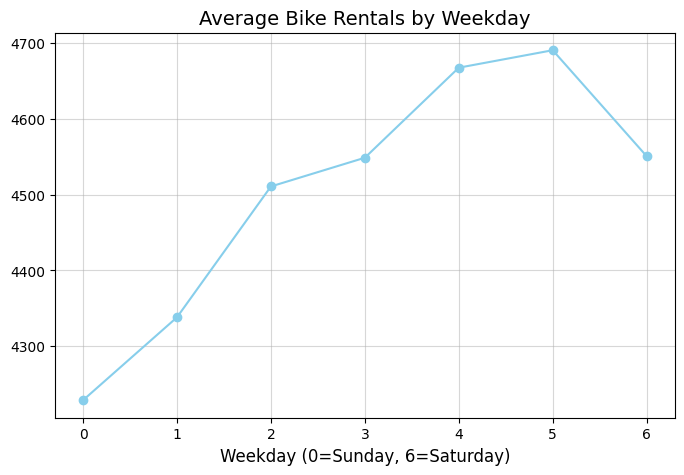

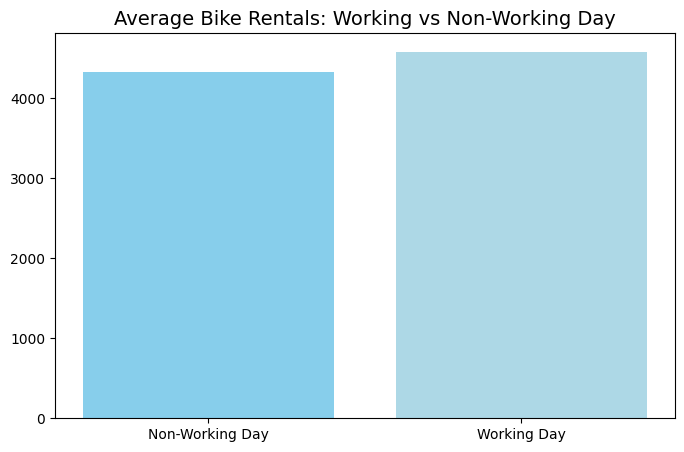

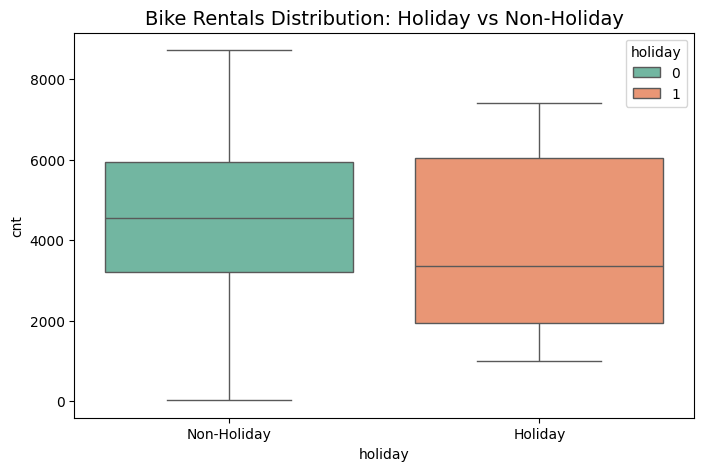

In [31]:
# Bar chart untuk average bike rentals holiday vs non-holiday
categories = ['holiday', 'non holiday']
values = [avg_rentals_holiday, avg_rentals_non_holiday]

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['skyblue', 'lightblue'])
plt.title('Average Bike Rentals: Holiday vs Non-Holiday', fontsize=14)
plt.show()

# Membuat line chart weekday
plt.figure(figsize=(8, 5))
plt.plot(avg_rentals_weekday.index, avg_rentals_weekday.values, marker='o', linestyle='-', color='skyblue')
plt.title('Average Bike Rentals by Weekday', fontsize=14)
plt.xlabel('Weekday (0=Sunday, 6=Saturday)', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# Data untuk bar chart workingday vs non-workingday
workingday_categories = ['Non-Working Day', 'Working Day']
workingday_values = avg_rentals_workingday.values
plt.figure(figsize=(8, 5))
plt.bar(workingday_categories, workingday_values, color=['skyblue', 'lightblue'])
plt.title('Average Bike Rentals: Working vs Non-Working Day', fontsize=14)
plt.show()


# Boxplot untuk melihat distribusi berdasarkan holiday
plt.figure(figsize=(8, 5))
sns.boxplot(x='holiday', y='cnt', data=day_df, hue= 'holiday', dodge= False, palette='Set2')
plt.title('Bike Rentals Distribution: Holiday vs Non-Holiday', fontsize=14)
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()



## Insigth: 
- **Grafik Bar chart, Average Bike Rentals: Holiday vs Non Holiday**
1. Menunjukkan bahwa sepeda lebih sering digunakan pada hari non-libur, yang mungkin disebabkan oleh penggunaannya untuk aktivitas rutin seperti perjalanan ke tempat kerja atau sekolah.
- **Grafik Line chart, Average Bike Rentals weekday**
1. Penyewaan sepeda cenderung meningkat dari awal minggu (Minggu) dan mencapai puncaknya pada Jumat dan Sabtu, sebelum sedikit menurun pada Minggu. Pola ini menunjukkan bahwa penggunaan sepeda meningkat menjelang akhir pekan, yang mungkin terkait dengan kombinasi aktivitas rutin (pekerjaan) dan aktivitas rekreasi pada Jumat dan Sabtu.
- **Grafik Bar chart, Average Bike Rentals: workingday vs non workingday**
1. Berdasarkan grafik tersebut, dapat disimpulkan bahwa orang lebih sering menyewa sepeda pada hari kerja dibandingkan dengan hari libur.
- **Grafik Box plot, Bike Rentals Distribution: Holiday vs Non-Holiday**
1. Pada hari non-libur (non-holiday), distribusi penyewaan memiliki median yang lebih tinggi dan variabilitas lebih kecil dibandingkan hari libur (holiday).
2. Pada hari libur, distribusi lebih tersebar, menunjukkan bahwa ada lebih banyak variasi dalam jumlah penyewaan sepeda.

### Pertanyaan 3:

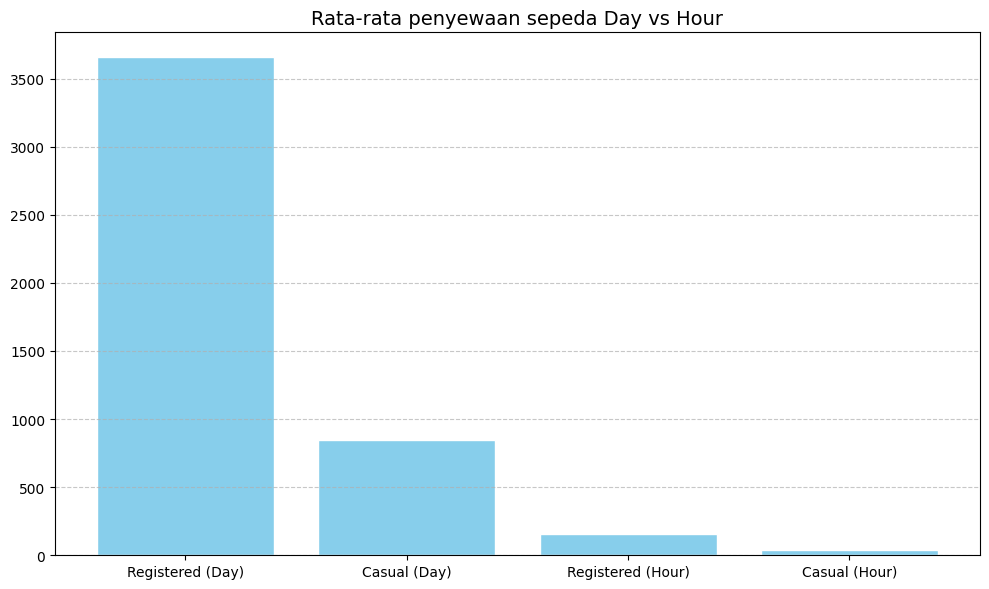

In [32]:
accumulate = ['Registered (Day)', 'Casual (Day)',
              'Registered (Hour)',  'Casual (Hour)']
jumlah = [avg_registered_day, avg_casual_day,
           avg_registered_hour, avg_casual_hour]

plt.figure(figsize=(10, 6))
plt.bar(accumulate, jumlah, color=['skyblue'], edgecolor='white')
plt.title('Rata-rata penyewaan sepeda Day vs Hour', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Insight:
1. Penyewaan tertinggi adalah sebagian besar penyewaan sepeda dilakukan oleh pengguna terdaftar (registered) yang menyewa sepeda dalam jangka waktu harian. disusul
pengguna tidak terdaftar (casual) yang menyewa sepeda dalam jangka waktu harian menempati posisi kedua dalam hal jumlah penyewaan.
2. Baik untuk pengguna terdaftar maupun tidak terdaftar, jumlah penyewaan sepeda per jam jauh lebih rendah dibandingkan dengan penyewaan per hari. Ini bisa mengindikasikan bahwa sebagian besar pengguna lebih memilih untuk menyewa sepeda dalam jangka waktu yang lebih lama.

## Conclusion

- **Conclution pertanyaan 1**
1. Kesimpulan yang dapat diambil dari analisis tren penyewaan sepeda selama tahun 2011 dan 2012 adalah bahwa terdapat pola musiman yang konsisten, di mana penyewaan meningkat dari awal tahun, mencapai puncaknya pada pertengahan tahun, lalu menurun menjelang akhir tahun. Tahun 2012 menunjukkan peningkatan jumlah penyewaan sepeda dibandingkan tahun 2011 di hampir setiap bulan, terutama pada bulan-bulan awal (Januari-Maret) dan periode puncak (Juni-September).
- **Conclution pertanyaan 2**
2. pola penyewaan sepeda dipengaruhi oleh jenis hari, yaitu hari kerja, hari libur, dan akhir pekan. Sepeda lebih sering digunakan pada hari kerja dibandingkan hari libur, menunjukkan bahwa sebagian besar penyewaan sepeda terkait dengan aktivitas rutin seperti perjalanan ke tempat kerja atau sekolah. Selain itu, penyewaan sepeda cenderung meningkat menjelang akhir pekan, terutama pada Jumat dan Sabtu, yang kemungkinan mencerminkan kombinasi antara kebutuhan untuk aktivitas rutin dan rekreasi.
Distribusi penyewaan sepeda pada hari non-libur memiliki median yang lebih tinggi dengan variabilitas lebih kecil dibandingkan dengan hari libur. Sebaliknya, pada hari libur, jumlah penyewaan sepeda menunjukkan variasi yang lebih besar, yang mungkin disebabkan oleh penggunaan sepeda untuk berbagai aktivitas rekreasi yang lebih fleksibel. 
- **Conclution pertanyaan 3**
3. Penyewaan sepeda lebih sering dilakukan oleh pengguna terdaftar (registered), yang mayoritas menyewa sepeda untuk jangka waktu harian. Pengguna tidak terdaftar (casual) juga berkontribusi pada jumlah penyewaan, namun sebagian besar memilih untuk menyewa sepeda dalam jangka waktu harian, meskipun dalam jumlah yang lebih rendah dibandingkan dengan pengguna terdaftar.
Selain itu, baik untuk pengguna terdaftar maupun tidak terdaftar, penyewaan sepeda per jam cenderung lebih rendah dibandingkan penyewaan per hari. Hal ini mengindikasikan bahwa sebagian besar pengguna lebih memilih untuk menyewa sepeda dalam jangka waktu yang lebih lama, yang bisa disebabkan oleh kebutuhan untuk penggunaan yang lebih fleksibel atau berkelanjutan